# Segunda Parte Classificação Binária (Regressão Logística e Redes Neurais)

### Objetivo

Classificar pacientes como diabéticos ou não diabéticos com base em uma ou mais variáveis preditoras.


Primeiras 5 linhas dos dados:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Descrição da tabela a ser analisada:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

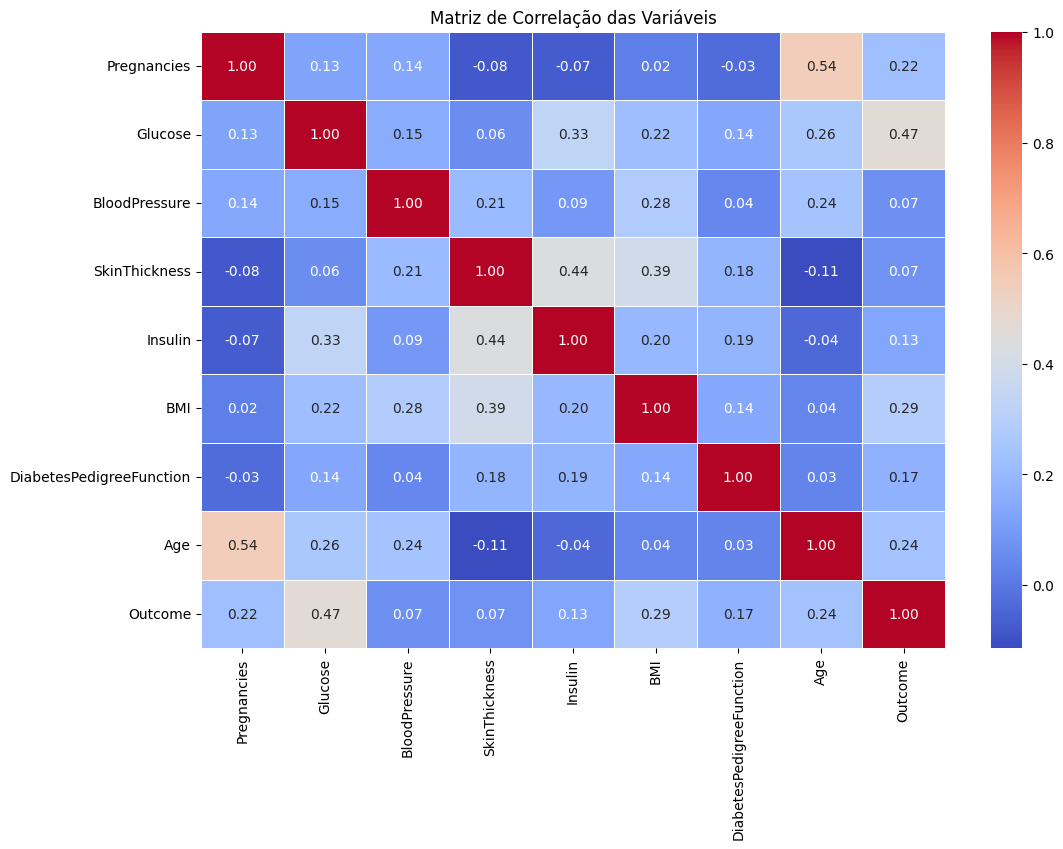

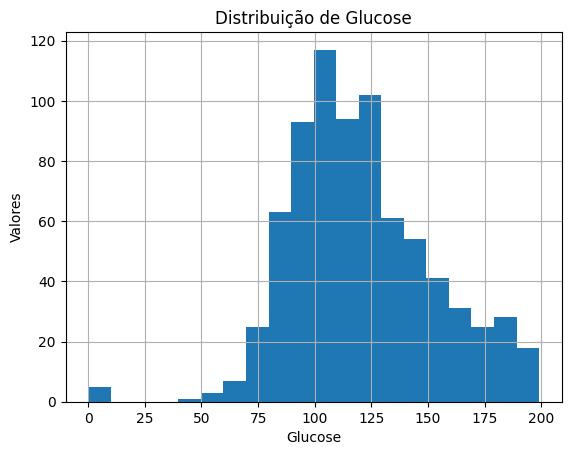

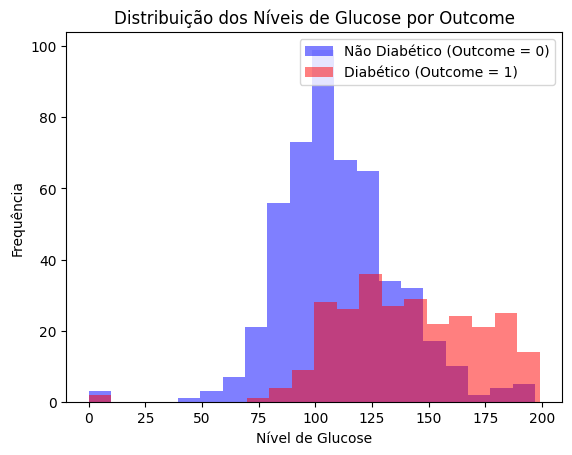

In [60]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age",
"Outcome"]
data = pd.read_csv(url, header=None, names=columns)

print(f"Primeiras 5 linhas dos dados:\n{data.head()}")

print(f'Descrição da tabela a ser analisada:\n {data.describe()}')

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

data['Glucose'].hist(bins=20)
plt.title('Distribuição de Glucose')
plt.xlabel('Glucose')
plt.ylabel('Valores')
plt.show()

# Separar as variáveis preditoras e alvo
X = data[['Glucose']].values # Escolher uma variável preditora (Exemplo: 'Glucose')
y = data['Outcome'].values # Variável alvo (0 ou 1)

plt.hist(data[data['Outcome'] == 0]['Glucose'], bins=20, alpha=0.5, label='Não Diabético (Outcome = 0)', color='blue')
plt.hist(data[data['Outcome'] == 1]['Glucose'], bins=20, alpha=0.5, label='Diabético (Outcome = 1)', color='red')
plt.title('Distribuição dos Níveis de Glucose por Outcome')
plt.xlabel('Nível de Glucose')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para essa parte, vou utilizar a variável que tem uma correlação maior (como mostra nossa *matriz de correlação*) com nossa variável alvo, nesse caso, seria a Glucose nossa variável preditiva.

Já no segundo gráfico, temos a destribuição da quantidade de glucose para cada pessoa, onde o pico fica entre 100 - 125. Também podemos ver alguns valores nulos nessa variável.

No terceiro gráfico, é mostrada a relação entre os indivíduos diabéticos ou não, e seu nível de glucose. Fica claro que, geralmente, quanto maior o nível de glucose, maior a probabilidade de ser diabético, confirmando a correlação positiva da glucose em relação ao Outcome.

# Modelo de Regressão Logística
## Métricas
- Acurácia: Proporção de predições corretas.
- Precisão: Proporção de verdadeiros positivos entre os positivos previstos.
- Recall: Proporção de verdadeiros positivos entre os positivos reais.
- F1-Score: Média harmônica entre precisão e recall.

In [61]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Avaliar o modelo de regressão logística
print("Regressão Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.2f}")

Regressão Logística:
Accuracy: 0.75
Precision: 0.70
Recall: 0.55
F1-Score: 0.61


# Modelo de Rede Neural
## Métricas
- Acurácia: Proporção de predições corretas.
- Precisão: Proporção de verdadeiros positivos entre os positivos previstos.
- Recall: Proporção de verdadeiros positivos entre os positivos reais.
- F1-Score: Média harmônica entre precisão e recall.

Epoch 1/50


c:\Users\HUMBERTO\Desktop\Code\Repos\College\SixthPeriod\InteligenciaArtificial\AI-Activity-2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.5383 - loss: 0.6874 
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.6741 - loss: 0.6452
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.6641 - loss: 0.6407
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.6384 - loss: 0.6535
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.6672 - loss: 0.6350
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.6644 - loss: 0.6375
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.6471 - loss: 0.6470
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.6433 - loss: 0.6491
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.6354 - loss: 0.6539
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.6387 - loss: 0.6510
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.6623 - loss: 0.6364
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accurac

c:\Users\HUMBERTO\Desktop\Code\Repos\College\SixthPeriod\InteligenciaArtificial\AI-Activity-2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


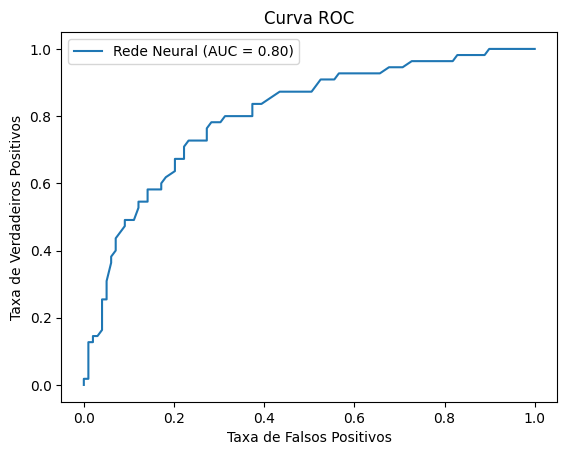

In [ ]:
nn_model = Sequential([
 Dense(10, activation='relu', input_shape=(1,)),
 Dense(5, activation='sigmoid'),
 Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

y_pred_nn = nn_model.predict(X_test).round()
print("Rede Neural:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nn):.2f}")

# Curva ROC para o modelo neural
fpr, tpr, thresholds = roc_curve(y_test, nn_model.predict(X_test))
plt.plot(fpr, tpr, label="Rede Neural (AUC = {:.2f})".format(roc_auc_score(y_test, nn_model.predict(X_test))))
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Regressão Logística x Rede Neural
ao final da execução, podemos ver que a regressão logística possui resultados sólidos quando comparamos ao modelo de rede neural, que por sua vez, varia muito pela questão da aleatoriedade na divisão de pesos.

ao rodar algumas vezes, é mostrado que as métricas de recall e f1-score, são as que mais variam no modelo de rede neural, porém, sempre mantendo-se abaixo de 60%, já a precisão pode chegar a ficar em 